# Análise de histograma e equalização
## Aula 9

## Histogramas
* Um histograma presenta a frequência com que cada valor aparece numa imagem;
* Faz uma distribuição **estatística** de cada valor;
* Com este gráfico, podemos:
  * Ter uma ideia geral quanto a iluminação de uma imagem;
  * Ter uma ideia geral quanto o contraste de uma imagem;
  * Ver picos de saturação;
  * Obter valores para thresholding;
  * Etc.

### Exemplos (iluminação)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
girl = np.array(Image.open('girl.jpg'))
(l, c, p) = girl.shape
girl_gray = ((0.2126 * girl[:, :, 0]) + (0.7152 * girl[:, :, 1]) + (0.0722 * girl[:, :, 2])).astype(np.uint8)

In [8]:
def histogram_gray(img):
    (l, c) = img.shape
    # Histograma com 1 linha e 256 colunas, preenchido com 0.
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            # Normalizar intensidade do pixel na faixa de
            # 0 a 255 para ser indexado no histograma.
            intensity = img[i, j]

            # Incrementar de 1 a quantidade de pixels no histograma,
            # utilizando a intensidade como índice.
            histogram[intensity] += 1
            
    return histogram

def show_histogram_gray(img):
    histogram = histogram_gray(img)
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    # vmin e vmax não permitem que o matplotlib faça normalização das cores.
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram)

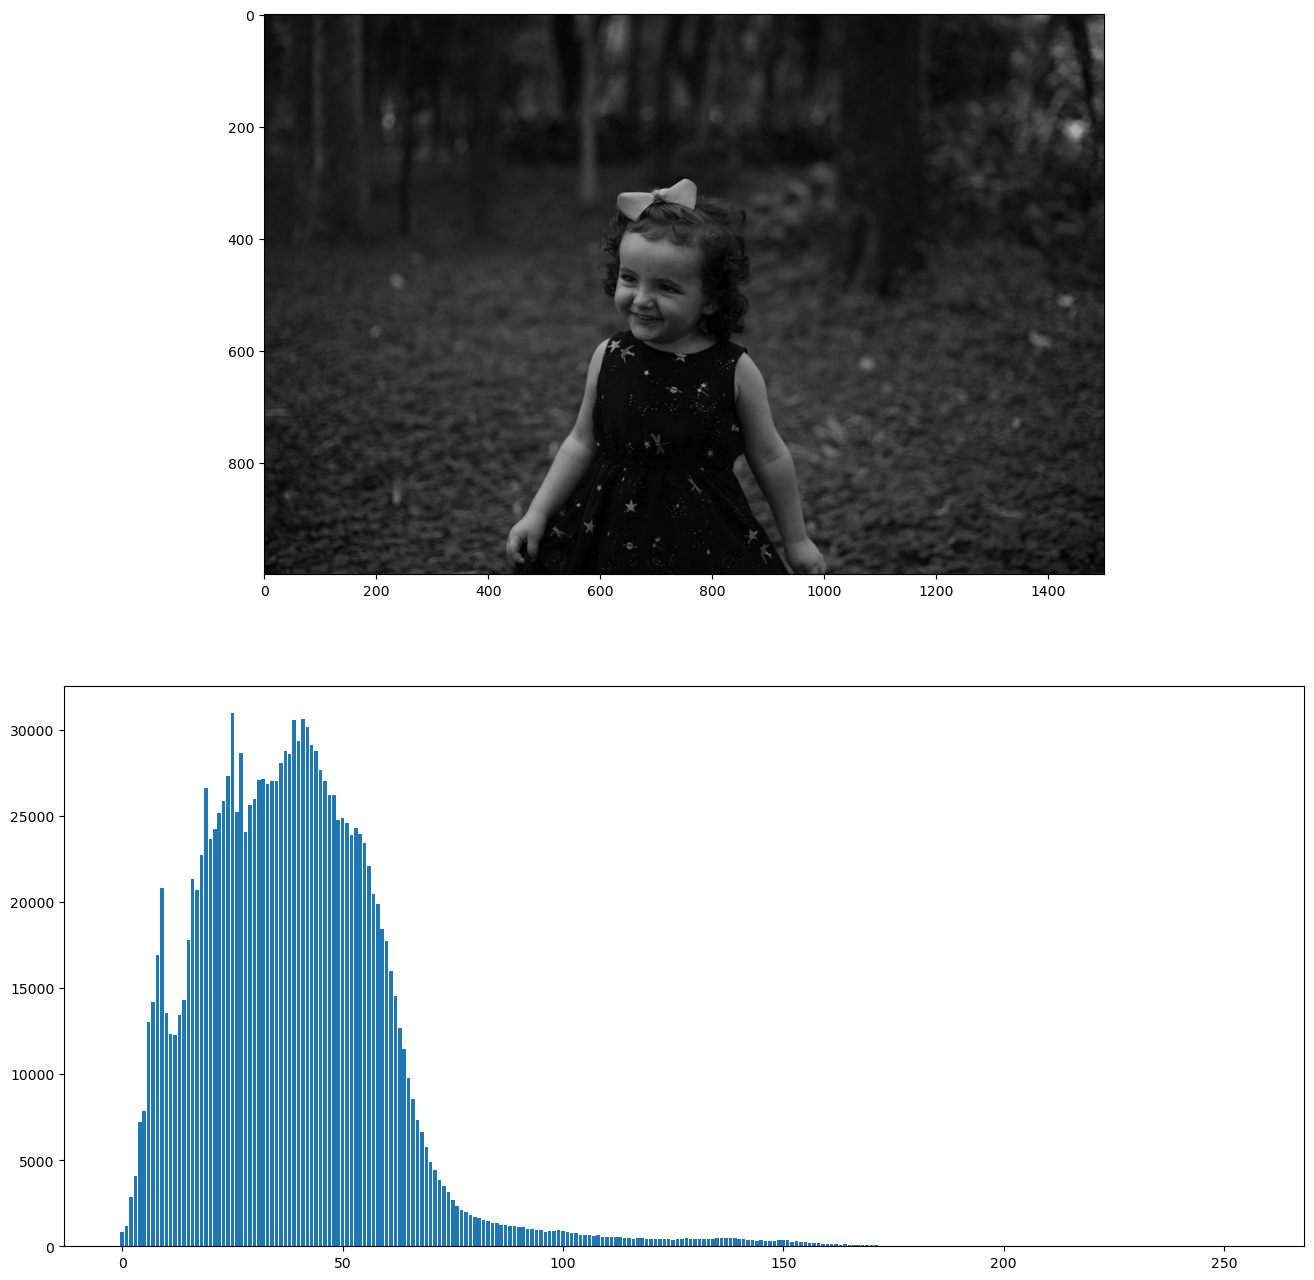

In [9]:
show_histogram_gray(girl_gray)

In [10]:
def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')

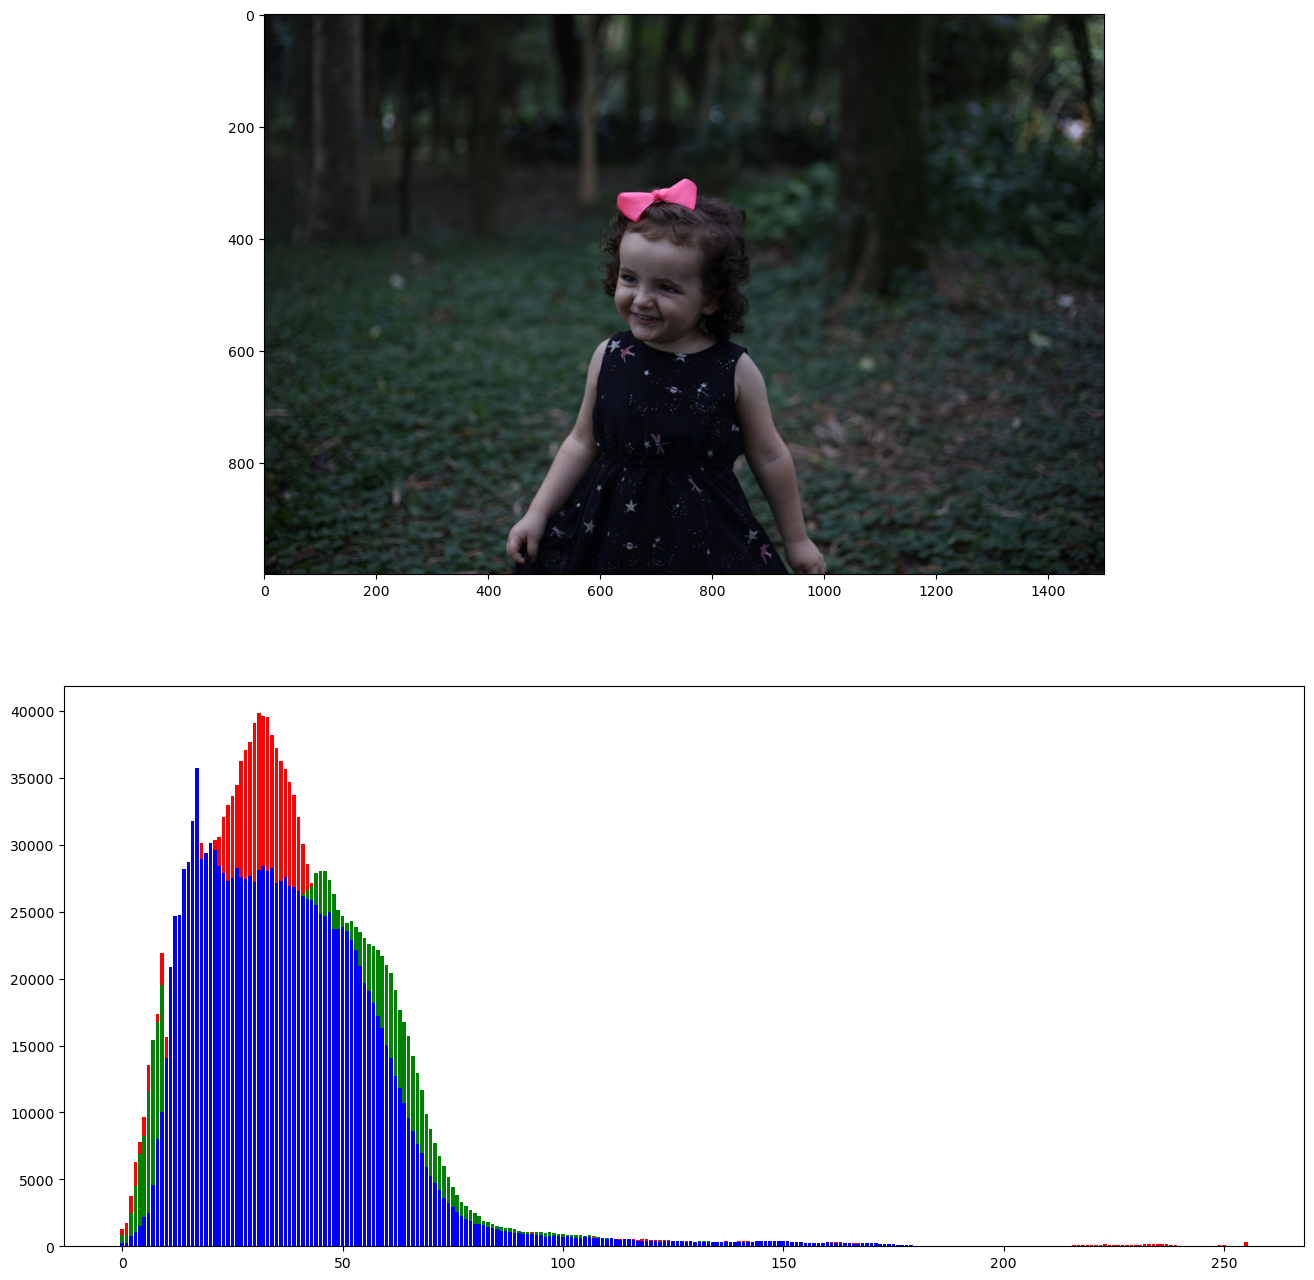

In [11]:
show_histogram(girl)

### Exemplos (constraste)

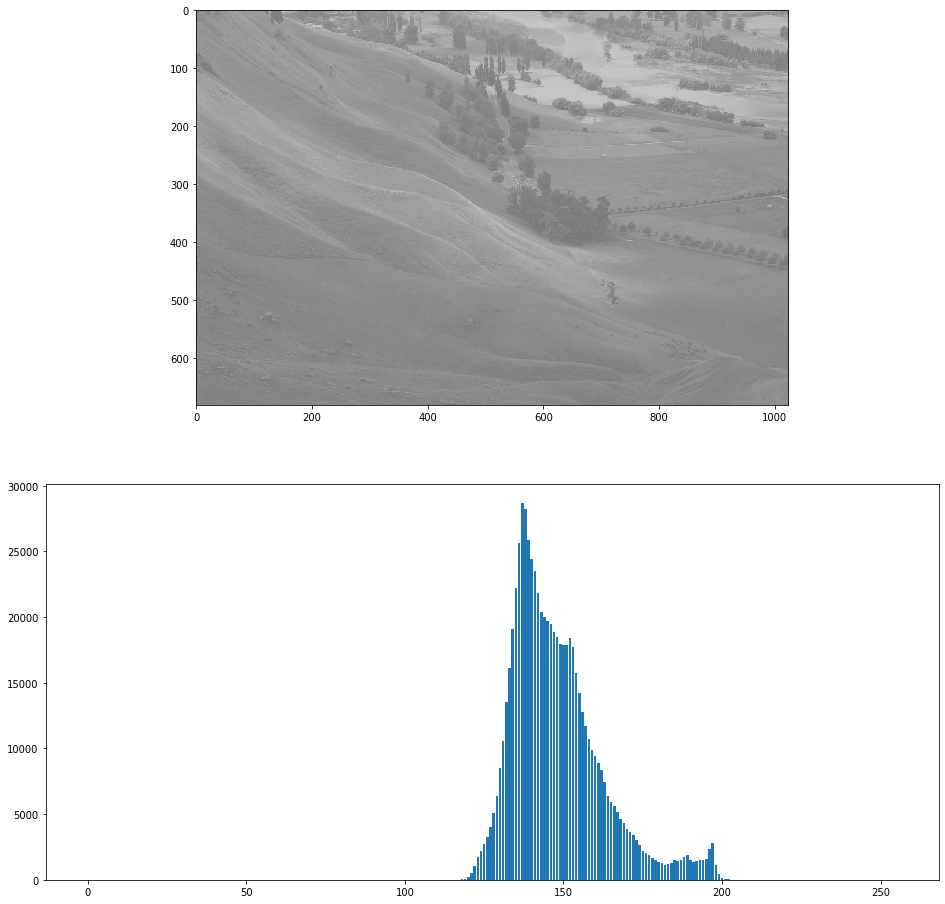

In [7]:
hill = np.array(Image.open('hill.jpg'))
show_histogram_gray(hill)

### Exemplos (saturação)

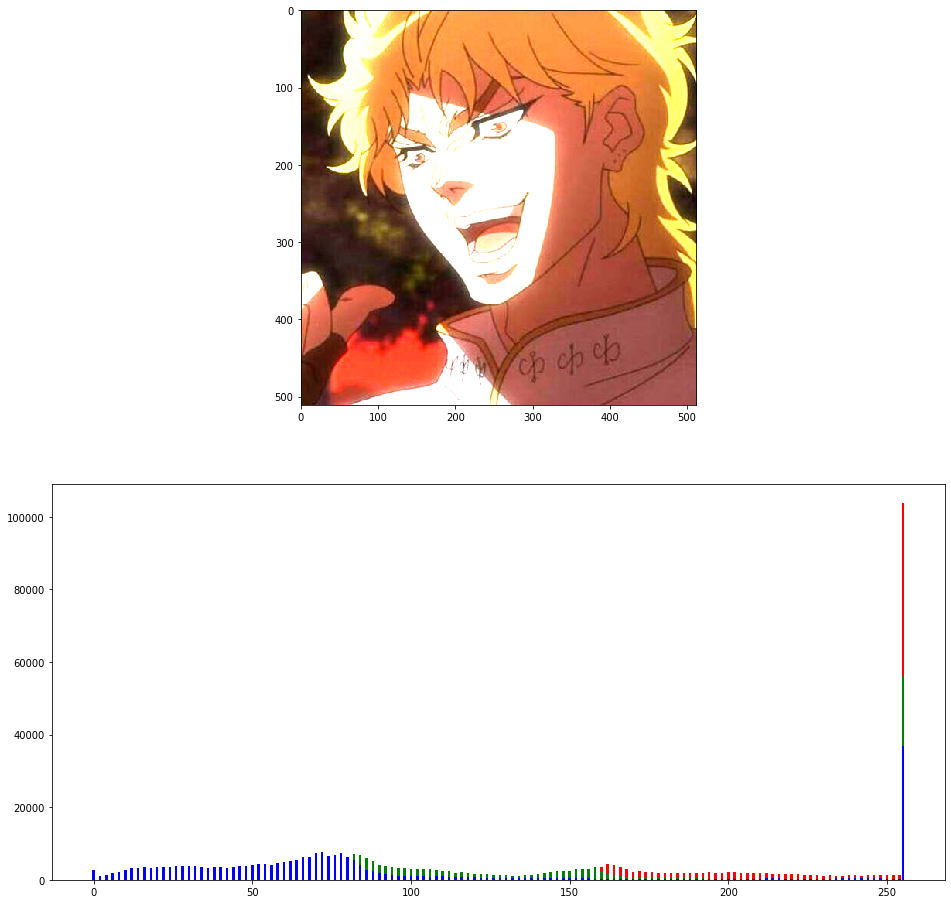

In [8]:
dio = np.array(Image.open('dio_satured.png'))
show_histogram(dio)

### Exemplos (thresholding)

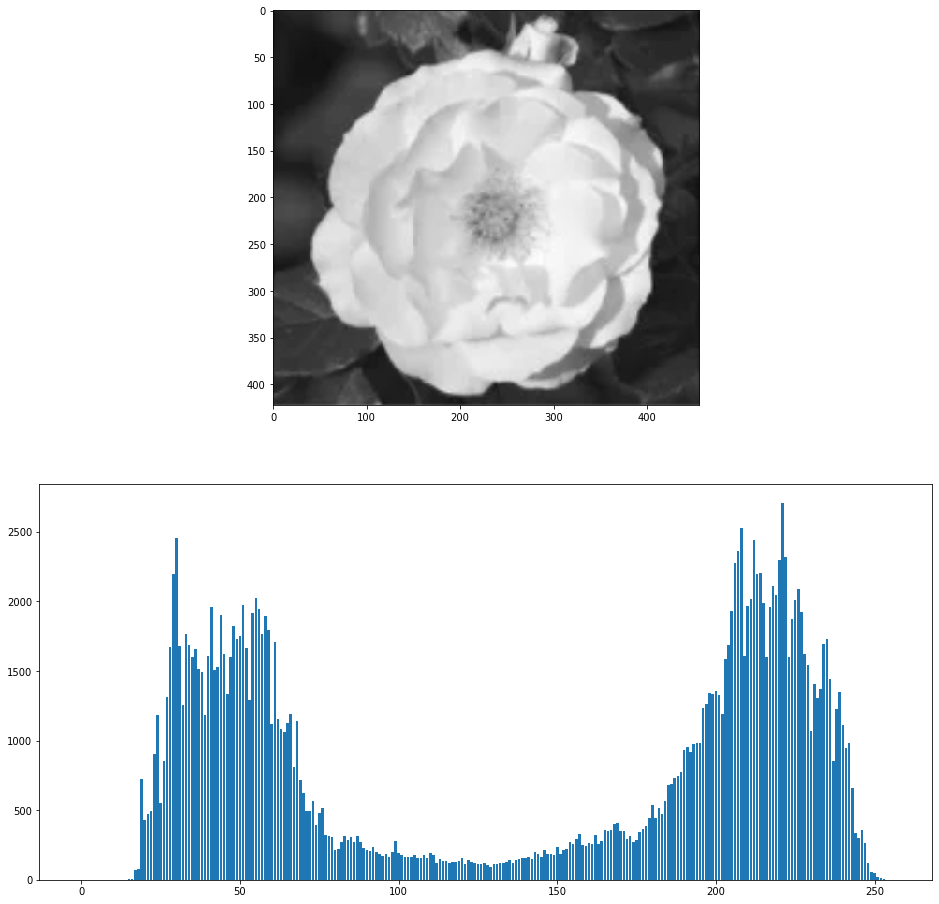

In [9]:
flower = np.array(Image.open('flower.png'))
show_histogram_gray(flower)

### Limitação
* Um histograma não fornece informação sobre a distribuição espacial dos pixels da imagem;
* Imagens diferentes podem compartilhar o mesmo histograma;
* Sendo assim, não é possível reconstruir imagens a partir de seu histograma.

|a|b|c|
|-|-|-|
|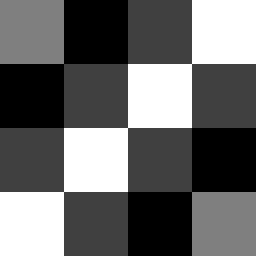|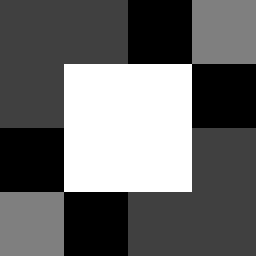|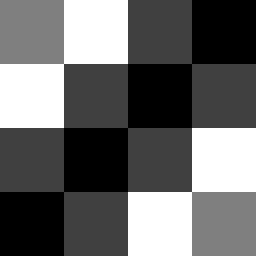|

## Equalização
* É uma técnica para ajustar o contraste (escala entre os tons mais luminosos e escuros);
* Quanto menor o contraste, mais fundidas são as cores; quando maior o contraste, mais marcadas são as cores;
* A equalização permite fazer uma melhor distribuição do contraste, ajustando o histograma da imagem;
* Existem várias fórmulas de equalização, não havendo uma "melhor" para todas as situações.

|Original|Equalizada|
|-|-|
|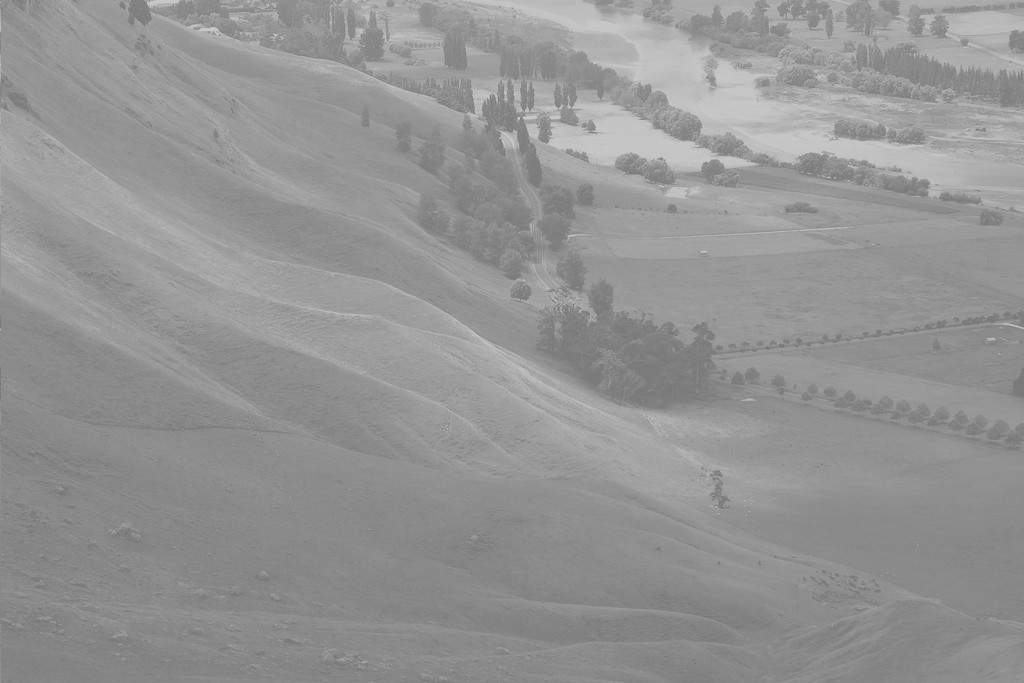|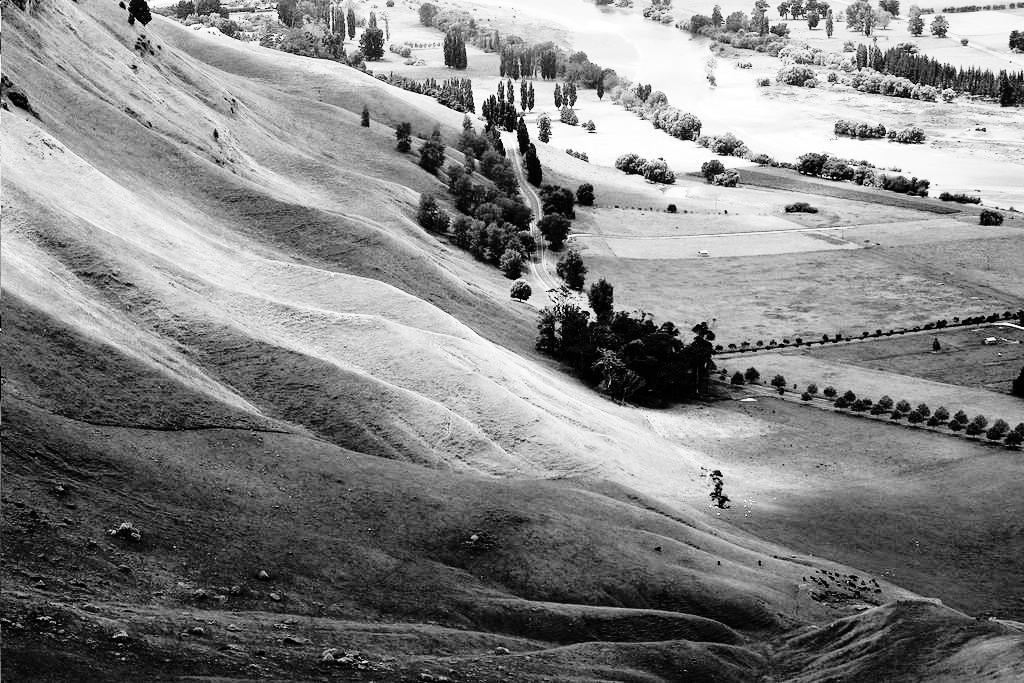|

### Técnica 1
$$h(v) = round\left(\frac{fdc(v) - fdc_{min}}{(M \times N) - fdc_{min}} \times (L - 1)\right)$$
* $v$: valor de intensidade original;
* $h(v)$: novo valor de intensidade para $v$;
* $fdc$: função densidade cumulativa (histograma cumulativo);
* $fdc_{min}$: valor mínimo da $fdc$;
* $L$: número de intensidades de pixel (normalmente 256):
* $M, N$: dimensões da imagem (largura e altura).

Ou, em Python:
```python
# percorrendo cada pixel da imagem:
novo_valor_de_pixel = np.round((fdc[intensidade] - np.min(fdc)) / ((l * c) - np.min(fdc)) * 255)```

### Técnica 2
$$g_{i,j} = \left\lfloor(L-1)\sum_{n=0}^{f_{i,j}}p_{n}\right\rfloor$$

$$p_{n} = \frac{\text{número de pixels com intensidade n}}{\text{número total de pixels}} \quad n=0,1,\dots,L-1$$
* $f_{i,j}$: valor de intensidade para o pixel em $i,j$;
* $g_{i,j}$: novo valor de intensidade para o pixel em $i,j$;
* $L$: nuḿero de intensidades de pixel (normalmente 256);
* $p_{n}$: frequência relativa da intensidade $n$.

Ou, em Python:
```python
# percorrendo cada pixel da imagem:
novo_valor_de_pixel = np.floor(255 * fdc_normalizada[intensidade])```

### Histograma cumulativo
Função densidade cumulativa:
$$H(i) = \sum_{j=0}^{i} h(j) \quad 0 \leq i < K$$

* $H(i)$: somatório de todas as frequências de intensidades até $i$;
* $h(j)$: frequência da intensidade $j$;
* $K$: número de intensidades do pixel (normalmente 256).

|Histograma original|Histograma cumulativo original|
|-|-|
|||
|**Histograma equalizado original**|**Histograma cumulativo equalizado**|
|||

# Exercícios

1. Escolha uma imagem colorida na internet e exiba os seguintes histogramas, utilizando `plt.subplot(2, 1, x)`:
  * Dos três canais (**<font color="red">R</font>**, **<font color="green">G</font>** e **<font color="blue">B</font>**) **na mesma janela** (isto é, todas em `x = 1`);
  * Em escala de cinza utilizando um dos três métodos vistos em aulas anteriores (em `x = 2`).

Lembrando:
* **Lightness**: $$\frac{max(r, g, b) + min(r, g, b))}{2}$$
* **Average**: $$\frac{r + g + b}{3}$$
* **Luminosity**: $$0.2126 \times r + 0.7152 \times g + 0.0722 \times b$$

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

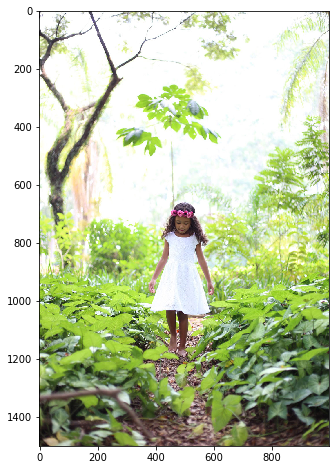

In [11]:
img = np.array(Image.open('foto_1.jpg'))[:, :, :3]
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [12]:
# Apenas para ficar mais completo, utilizarei as três técnicas:
def lightness(img):
    M = np.max(img, axis=2).astype(np.float64)
    m = np.min(img, axis=2).astype(np.float64)
    return ((M + m) / 2).astype(img.dtype)

def average(img):
    r = img[:, :, 0].astype(np.float64)
    g = img[:, :, 1].astype(np.float64)
    b = img[:, :, 2].astype(np.float64)
    return ((r + g + b) / 3).astype(img.dtype)

def luminosity(img):
    r = img[:, :, 0].astype(np.float64)
    g = img[:, :, 1].astype(np.float64)
    b = img[:, :, 2].astype(np.float64)
    return (0.2126 * r + 0.7152 * g + 0.0722 * b).astype(img.dtype)

In [13]:
def histogram(img):
    (l, c) = img.shape
    h = np.zeros(shape=256, dtype=np.int32)
    for i in range(l):
        for j in range(c):
            intensity = img[i, j]
            h[intensity] += 1
            
    return h

def histogram3(img):
    hr = histogram(img[:, :, 0])
    hg = histogram(img[:, :, 1])
    hb = histogram(img[:, :, 2])
    return (hr, hg, hb)

<BarContainer object of 256 artists>

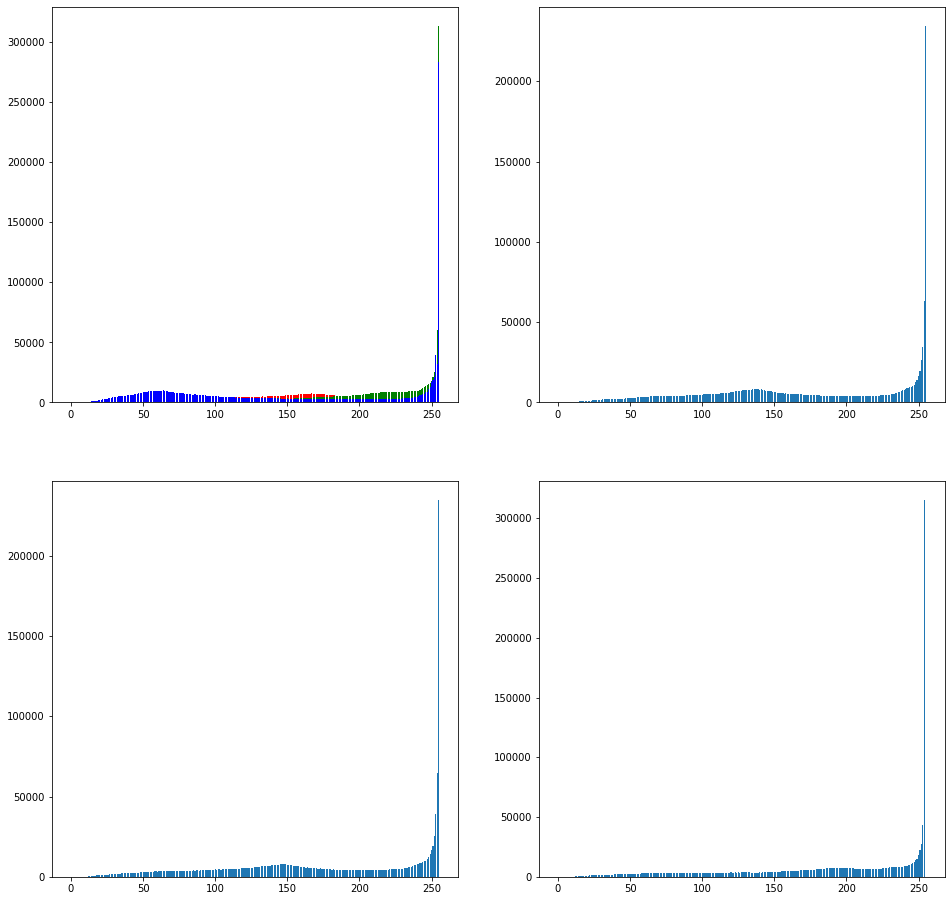

In [14]:
plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
(hr, hg, hb) = histogram3(img)
plt.bar(range(256), hr, color='red')
plt.bar(range(256), hg, color='green')
plt.bar(range(256), hb, color='blue')

plt.subplot(2, 2, 2)
h_lightness = histogram(lightness(img))
plt.bar(range(256), h_lightness)

plt.subplot(2, 2, 3)
h_average = histogram(average(img))
plt.bar(range(256), h_average)

plt.subplot(2, 2, 4)
h_luminosity = histogram(luminosity(img))
plt.bar(range(256), h_luminosity)

2. Escolha uma imagem em grayscale, de preferência com baixo contraste, e aplique nela uma das duas abordagens de equalização.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
img = np.array(Image.open('hill.jpg'))

In [3]:
def histogram(img):
    (l, c) = img.shape
    h = np.zeros(shape=256, dtype=np.int32)
    for i in range(l):
        for j in range(c):
            intensity = img[i, j]
            h[intensity] += 1
            
    return h

def cdf(img):
    h = histogram(img)
    H = np.zeros(shape=256, dtype=np.int32)
   
    H[0] = h[0]          
    for i in range(1, 256):            
        H[i] = H[i - 1] + h[i]   
        print(h[i], H[i])
    
    return H

### Técnica 1:

In [4]:
def equalize1(img):
    (l, c) = img.shape
    h = cdf(img)
    h_min = h[0]
    area = l * c
    img_equalized = np.zeros(shape=img.shape, dtype=img.dtype)
    for i in range(l):
        for j in range(c):
            intensity = img[i, j]
            img_equalized[i, j] = np.round((h[intensity] - h_min) / (area - h_min) * 255)
            
    return img_equalized

In [ ]:
img_equalized = equalize1(img)

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
3 4
10 14
20 34
48 82
94 176
224 400
508 908
1064 1972
1739 3711
2197 5908
2700 8608
3277 11885
4032 15917
5118 21035
6406 27441
8476 35917
10579 46496
13518 60014
16123 76137
19126 95263
22189 117452
25656 143108
28663 171771
28215 199986
25839 225825
24430 250255
23472 273727
21809 295536
20350 315886
19974 335860
19664 355524
19443 374967
18894 393861
18464 412325
17920 430245
17840 448085
17851 465936
18408 484344
17732 502076
15750 517826
14218 532044
12750 544794
11706 556500
10708 567208
9868 577076
9424 586500
8871 595371
8393 603

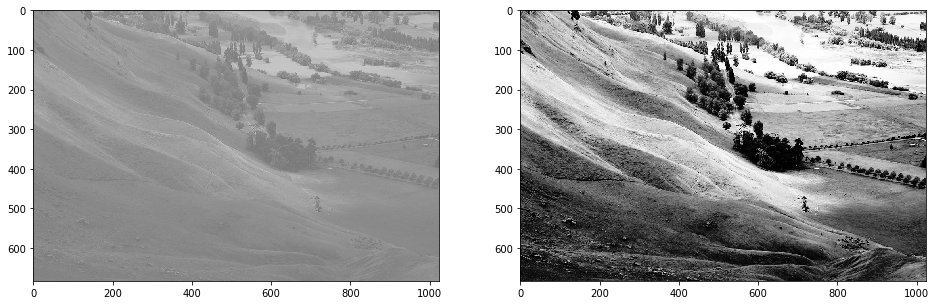

In [20]:
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(img_equalized, cmap='gray', vmin=0, vmax=255)

In [21]:
Image.fromarray(img_equalized).save('hill_eq1.jpg')

### Técnica 2:

In [22]:
def normalized_cdf(img):
    h = cdf(img)
    (l, c) = img.shape
    return h / (l * c)

In [23]:
def equalize2(img):
    (l, c) = img.shape
    h = normalized_cdf(img)
    img_equalized = np.zeros(shape=img.shape, dtype=img.dtype)
    for i in range(l):
        for j in range(c):
            intensity = img[i, j]
            img_equalized[i, j] = np.floor(h[intensity] * 255)
            
    return img_equalized

In [24]:
img_equalized2 = equalize2(img)

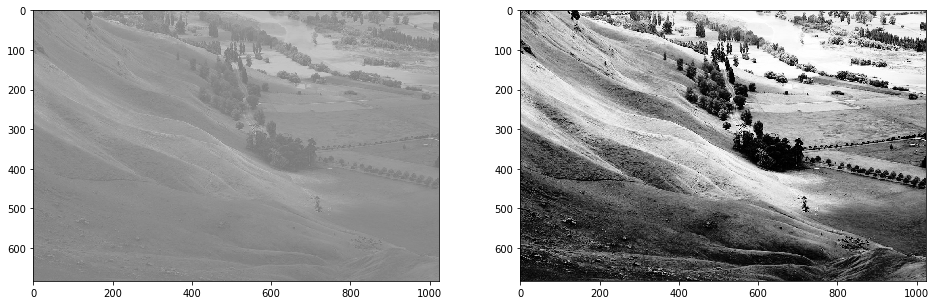

In [25]:
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(img_equalized2, cmap='gray', vmin=0, vmax=255)

In [26]:
Image.fromarray(img_equalized2).save('hill_eq2.jpg')

In [27]:
# Testa se os dois arrays são iguais com uma tolerância absoluta de 1:
print(np.allclose(img_equalized, img_equalized2, atol=1))

True


# Referências:
* https://www.infopedia.pt/$contraste-(fotografia)
* https://en.wikipedia.org/wiki/Contrast_(vision)
* https://www.allaboutcircuits.com/technical-articles/image-histogram-characteristics-machine-learning-image-processing/
* https://en.wikipedia.org/wiki/Histogram_equalization
* https://www.math.uci.edu/icamp/courses/math77c/demos/hist_eq.pdf

Aula remota, conforme Port. 345/2020 – MEC